## **Assignment 3**
### Author - Pugalarasu K

## **1. Download the Dataset**
https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view

In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **2. Image Augmentation**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
datagen = ImageDataGenerator(rescale = 1.0/225, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False, validation_split = 0.25)

In [17]:
x_train = datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(100,100),class_mode='categorical',subset='training')

Found 3238 images belonging to 5 classes.


In [18]:
x_test = datagen.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(100,100),class_mode='categorical',subset='validation')

Found 1079 images belonging to 5 classes.


In [19]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [20]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

## **3. Create Model**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [22]:
model = Sequential()

## **4. Add Layers (Convolution, Max Pooling, Flatten, Dense - (Hidden Layers), Output)**

In [23]:
model.add(Convolution2D(32,(3,3),input_shape=(100,100,3),activation='relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [27]:
model.add(Dense(5,activation='softmax'))

## **5. Compile the model**

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## **6. Fit the model**

In [29]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
102/102 [==============================] - 869s 9s/step - loss: 1.6050 - accuracy: 0.4762 - val_loss: 1.1092 - val_accuracy: 0.5533
Epoch 2/15
102/102 [==============================] - 37s 361ms/step - loss: 1.0464 - accuracy: 0.5991 - val_loss: 1.0468 - val_accuracy: 0.5968
Epoch 3/15
102/102 [==============================] - 37s 359ms/step - loss: 0.9504 - accuracy: 0.6384 - val_loss: 1.0153 - val_accuracy: 0.6043
Epoch 4/15
102/102 [==============================] - 37s 359ms/step - loss: 0.8862 - accuracy: 0.6544 - val_loss: 0.9947 - val_accuracy: 0.6145
Epoch 5/15
102/102 [==============================] - 37s 359ms/step - loss: 0.8307 - accuracy: 0.6872 - val_loss: 0.9944 - val_accuracy: 0.6423
Epoch 6/15
102/102 [==============================] - 37s 361ms/step - loss: 0.7918 - accuracy: 0.6992 - val_loss: 1.0259 - val_accuracy: 0.6219
Epoch 7/15
102/102 [==============================] - 37s 361ms/step - loss: 0.7431 - accuracy: 0.7236 - val_loss: 0.9605 - val_accu

## **7. Save the model**

In [30]:
model.save('flowers.h5')

## **8. Test the model**

In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model = load_model('flowers.h5')

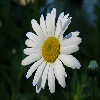

In [37]:
img = image.load_img('/content/drive/MyDrive//flowers/daisy/2521408074_e6f86daf21_n.jpg',target_size=(100, 100))
img

In [38]:
x = image.img_to_array(img)
x

array([[[ 8., 20.,  6.],
        [11., 25., 12.],
        [10., 26., 16.],
        ...,
        [38., 66., 77.],
        [28., 48., 46.],
        [17., 37., 28.]],

       [[ 8., 20.,  8.],
        [11., 25., 12.],
        [12., 28., 18.],
        ...,
        [35., 63., 75.],
        [27., 48., 49.],
        [19., 38., 36.]],

       [[ 7., 19.,  7.],
        [ 9., 22., 12.],
        [12., 29., 21.],
        ...,
        [33., 58., 63.],
        [27., 49., 47.],
        [23., 47., 47.]],

       ...,

       [[12., 27.,  6.],
        [11., 26.,  7.],
        [ 9., 22.,  5.],
        ...,
        [10., 28.,  6.],
        [10., 25.,  6.],
        [10., 25.,  6.]],

       [[12., 25.,  7.],
        [10., 23.,  6.],
        [ 9., 19.,  8.],
        ...,
        [11., 29.,  5.],
        [10., 25.,  6.],
        [10., 25.,  6.]],

       [[11., 22.,  6.],
        [ 9., 20.,  6.],
        [ 6., 16.,  8.],
        ...,
        [ 8., 26.,  4.],
        [10., 23.,  5.],
        [10., 23.,  5.]]

In [39]:
x = np.expand_dims(x, axis=0)
x

array([[[[ 8., 20.,  6.],
         [11., 25., 12.],
         [10., 26., 16.],
         ...,
         [38., 66., 77.],
         [28., 48., 46.],
         [17., 37., 28.]],

        [[ 8., 20.,  8.],
         [11., 25., 12.],
         [12., 28., 18.],
         ...,
         [35., 63., 75.],
         [27., 48., 49.],
         [19., 38., 36.]],

        [[ 7., 19.,  7.],
         [ 9., 22., 12.],
         [12., 29., 21.],
         ...,
         [33., 58., 63.],
         [27., 49., 47.],
         [23., 47., 47.]],

        ...,

        [[12., 27.,  6.],
         [11., 26.,  7.],
         [ 9., 22.,  5.],
         ...,
         [10., 28.,  6.],
         [10., 25.,  6.],
         [10., 25.,  6.]],

        [[12., 25.,  7.],
         [10., 23.,  6.],
         [ 9., 19.,  8.],
         ...,
         [11., 29.,  5.],
         [10., 25.,  6.],
         [10., 25.,  6.]],

        [[11., 22.,  6.],
         [ 9., 20.,  6.],
         [ 6., 16.,  8.],
         ...,
         [ 8., 26.,  4.],
        

In [40]:
y = np.argmax(model.predict(x),axis=1)
y

array([0])

In [41]:
index = ['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [42]:
index[y[0]]

'Daisy'

## **Test 2**

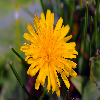

In [44]:
img = image.load_img('/content/drive/MyDrive/flowers/dandelion/2495749544_679dc7ccef.jpg',target_size=(100, 100))
img

In [45]:
x = image.img_to_array(img)

In [46]:
x = np.expand_dims(x, axis=0)

In [47]:
y = np.argmax(model.predict(x),axis=1)
y

array([1])

In [48]:
index[y[0]]

'Dandelion'

## **Test 3**

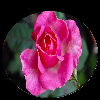

In [50]:
img = image.load_img('/content/drive/MyDrive/flowers/rose/8050213579_48e1e7109f.jpg',target_size=(100, 100))
img

In [51]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = np.argmax(model.predict(x),axis=1)
y

array([2])

In [52]:
index[y[0]]

'Rose'

## **Test 4**

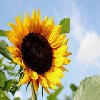

In [53]:
img = image.load_img('/content/drive/MyDrive/flowers/sunflower/5933438337_b26a81ea81_n.jpg',target_size=(100, 100))
img

In [54]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = np.argmax(model.predict(x),axis=1)
y

array([3])

In [55]:
index[y[0]]

'Sunflower'

## **Test 5**

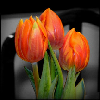

In [56]:
img = image.load_img('/content/drive/MyDrive/flowers/tulip/2785458179_9130812eef_m.jpg',target_size=(100, 100))
img

In [57]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
y = np.argmax(model.predict(x),axis=1)
y

array([4])

In [58]:
index[y[0]]

'Tulip'